In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plutils import general

In [2]:
MINE = '/net/topmed10/working/porchard/rnaseq/work/test-crossmap/results/snp-mappability/snp_mappability_75mer_2mismatch.bed.gz'
THEIRS = '/net/topmed10/working/porchard/rnaseq/data/mappability/hg38_snp_mappability_75mer.bed.bgz'

In [3]:
# examine chr21
WINDOW = 'chr21:1-9999999999999'
mine = general.tabix(MINE, WINDOW)
mine.columns = ['chrom', 'start', 'end', 'score']
for i in ['score']:
    mine[i] = mine[i].astype(float)
for i in ['start', 'end']:
    mine[i] = mine[i].astype(int)
mine.head()

,chrom,start,end,score
0,chr21,0,1,0.0
1,chr21,1,2,0.0
2,chr21,2,3,0.0
3,chr21,3,4,0.0
4,chr21,4,5,0.0


In [4]:
theirs = general.tabix(THEIRS, WINDOW)
theirs.columns = ['chrom', 'start', 'end', 'score']
for i in ['score']:
    theirs[i] = theirs[i].astype(float)
for i in ['start', 'end']:
    theirs[i] = theirs[i].astype(int)
theirs.head()

,chrom,start,end,score
0,chr21,0,5010002,0.000000
1,chr21,5010002,5010003,0.006667
2,chr21,5010003,5010004,0.013333
3,chr21,5010004,5010005,0.020000
4,chr21,5010005,5010006,0.026667


In [5]:
# expand their scores
# pos --> score
their_scores = dict()
for start, end, score in zip(theirs.start, theirs.end, theirs.score):
    for pos in range(start+1, end+1):
        their_scores[pos] = score

In [6]:
comb = mine.rename(columns={'score': 'mine'})
comb['theirs'] = comb.end.map(their_scores)
comb.head()

,chrom,start,end,mine,theirs
0,chr21,0,1,0.0,0.0
1,chr21,1,2,0.0,0.0
2,chr21,2,3,0.0,0.0
3,chr21,3,4,0.0,0.0
4,chr21,4,5,0.0,0.0


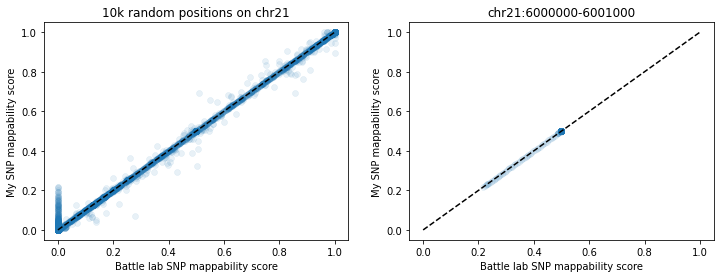

In [7]:
fig, axs = plt.subplots(ncols=2, figsize=(6*2, 4))

ax = axs[0]
ax.set_title('10k random positions on chr21')
sns.scatterplot(x='theirs', y='mine', data=comb.sample(10000), ax=ax, edgecolor=None, alpha=0.1)
ax.set_xlabel('Battle lab SNP mappability score')
ax.set_ylabel('My SNP mappability score')
ax.plot([0, 1], [0, 1], ls='--', color='black')

ax = axs[1]
ax.set_title('chr21:6000000-6001000')
sns.scatterplot(x='theirs', y='mine', data=comb[(comb.end>6000000) & (comb.end<=6001000)], ax=ax, edgecolor=None, alpha=0.1)
ax.set_xlabel('Battle lab SNP mappability score')
ax.set_ylabel('My SNP mappability score')
ax.plot([0, 1], [0, 1], ls='--', color='black')